<a href="https://colab.research.google.com/github/RahafSh/DeepLearning_JobDescription/blob/main/NN_Task06_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Selection and Neural Network Experimentation** `Task Week 06`
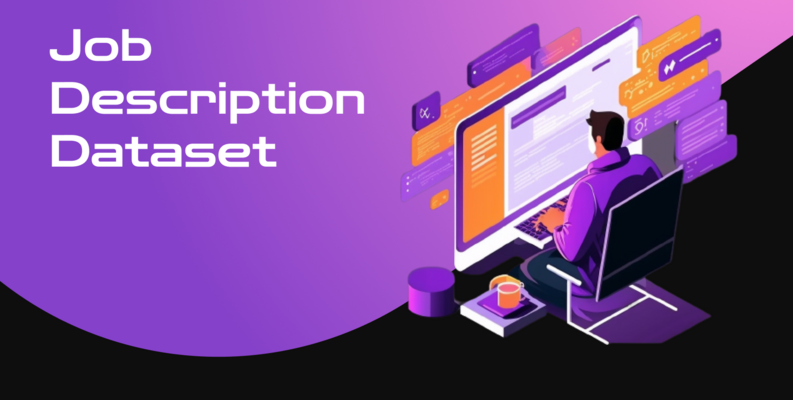


## Abeer Almisbahi - Rahaf Shiqdar - Shahad Alzubaidi
----


#**1. Dataset Selection**

- Our data is from **Kaggle** you can download it.

  **Dataset Link:**  [Click here](https://www.kaggle.com/datasets/ravindrasinghrana/job-description-dataset/data)
- The dataset contain 500,000 Rows and 23 Columns.
- The classification task in our task is: Building predictive models to forecast job market trends for the Saudi Arabia market specially.


```
Load Dataset and Exploration
```

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ME data.csv')

In [ ]:
fraction_to_keep = 0.2

data_sampled = data.sample(frac=fraction_to_keep, random_state=42)

print("Shape of sampled dataset:", data_sampled.shape)

Shape of sampled dataset: (15493, 23)


In [ ]:
display(data.head(3))
display(data.info())

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,2.696960e+15,3 to 10 Years,BCA,$57K-$104K,Manama,Bahrain,26.0667,50.5577,Contract,130338,...,001-683-879-1350,QA Analyst,Performance Testing Specialist,Glassdoor,Performance Testing Specialists assess the per...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Performance testing Load testing Stress testin...,Focus on performance and load testing to asses...,McDonald's,"{""Sector"":""Food and Beverage"",""Industry"":""Food..."
1,1.627540e+15,1 to 9 Years,MCA,$57K-$98K,Damascus,Syrian Arab Republic,34.8021,38.9968,Full-Time,92128,...,001-805-834-6153,Account Manager,Sales Account Manager,USAJOBS,A Sales Account Manager is responsible for bui...,"{'Casual Dress Code, Social and Recreational A...",Account management Sales strategy Negotiation ...,Manage sales accounts and ensure revenue growt...,NGL Energy Partners,"{""Sector"":""Energy"",""Industry"":""Pipelines"",""Cit..."
2,2.691970e+15,4 to 12 Years,M.Com,$65K-$100K,Sanaa,Yemen,15.5527,48.5164,Part-Time,92028,...,001-609-517-5993,Brand Manager,Product Brand Manager,SimplyHired,A Product Brand Manager focuses on promoting a...,"{'Health Insurance, Retirement Plans, Flexible...",Product branding and marketing Product lifecyc...,Manage the branding of specific products or pr...,Bayer AG,"{""Sector"":""Pharmaceuticals"",""Industry"":""Pharma..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77463 entries, 0 to 77462
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Job Id            77463 non-null  float64
 1   Experience        77463 non-null  object 
 2   Qualifications    77463 non-null  object 
 3   Salary Range      77463 non-null  object 
 4   location          77463 non-null  object 
 5   Country           77463 non-null  object 
 6   latitude          77463 non-null  float64
 7   longitude         77463 non-null  float64
 8   Work Type         77463 non-null  object 
 9   Company Size      77463 non-null  int64  
 10  Job Posting Date  77463 non-null  object 
 11  Preference        77463 non-null  object 
 12  Contact Person    77463 non-null  object 
 13  Contact           77463 non-null  object 
 14  Job Title         77463 non-null  object 
 15  Role              77463 non-null  object 
 16  Job Portal        77463 non-null  object

None

In [ ]:
# Split the Experience into Min & Max
data_sampled[['Min_Years_Experience', 'Max_Years_Experience']] = data_sampled['Experience'].str.split(' to ', expand=True)

data_sampled['Min_Years_Experience'] = data_sampled['Min_Years_Experience'].astype(int) # Number
data_sampled['Max_Years_Experience'] = data_sampled['Max_Years_Experience'].astype(str) # 12 Years that's why str

data_sampled['Max_Years_Experience'] = data_sampled['Max_Years_Experience'].str.replace(' Years', '') # delete Years word
data_sampled['Max_Years_Experience'] = data_sampled['Max_Years_Experience'].astype('int') # convert it into int

data_sampled['Qualifications'] = data_sampled['Qualifications'].str.replace('.', '') # replace any word contains . with embty

data_sampled.drop(['Company Profile','Experience', 'latitude','longitude','Company Size'],axis=1, inplace=True)

data_sampled.rename(columns={'Contact Person':'Recruiter Name'}, inplace=True)


In [ ]:
data_sampled = data_sampled[data_sampled["Preference"] != "Both"]
data_sampled['Preference'].value_counts()
data_sampled.loc[:, "Preference"] = data_sampled["Preference"].map({"Male": 0, "Female": 1})

In [ ]:
class_distribution = data_sampled['Preference'].value_counts()

# Print the class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate the proportion of each class
class_proportions = class_distribution / class_distribution.sum()

# Print the proportion of each class
print("\nProportion of Each Class:")
print(class_proportions)

Class Distribution:
Preference
0    5177
1    5111
Name: count, dtype: int64

Proportion of Each Class:
Preference
0    0.503208
1    0.496792
Name: count, dtype: float64


In [ ]:
data_sampled.sample(4)

,Job Id,Qualifications,Salary Range,location,Country,Work Type,Job Posting Date,Preference,Recruiter Name,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Min_Years_Experience,Max_Years_Experience
59520,2.438610e+15,MTech,$58K-$107K,Tehran,"Iran, Islamic Rep.",Part-Time,10/10/2021,1,John Williamson,(275)996-6287,Nurse Manager,Clinical Nurse Manager,Jobs2Careers,Clinical Nurse Managers lead and supervise nur...,"{'Transportation Benefits, Professional Develo...",Clinical nursing Patient assessment Care plann...,Manage clinical nursing teams in hospitals or ...,Bosch Limited,4,12
6675,2.576350e+15,BCA,$63K-$86K,Nicosia,Cyprus,Intern,22/06/2022,1,Nicole Vaughn,529.675.1441x048,Registered Nurse,Clinical Nurse Specialist,FlexJobs,A Clinical Nurse Specialist is an advanced pra...,"{'Employee Referral Programs, Financial Counse...","Clinical nursing specialization (e.g., critica...","Specialize in a specific area of patient care,...",New York Life Insurance,0,9
28752,2.170560e+15,MCom,$60K-$129K,Manama,Bahrain,Temporary,04/12/2021,0,Steven Martin,001-768-707-0661,Account Manager,Client Relationship Manager,Snagajob,Build and maintain strong client relationships...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Client relationship management Customer servic...,Build and nurture strong client relationships....,McDonald's,4,10
42463,6.118400e+14,BCom,$56K-$130K,Cairo,Egypt,Intern,30/01/2022,0,David Simpson,+1-406-754-7082x006,Research Analyst,Market Research Analyst,CareerBuilder,A Market Research Analyst gathers and analyzes...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Market research methodologies Data collection ...,Conduct market research to gather data on cons...,Stockland Corporation,5,14


In [ ]:
data_sampled.nunique()

Job Id                  10187
Qualifications             10
Salary Range              561
location                   16
Country                    16
Work Type                   5
Job Posting Date          731
Preference                  2
Recruiter Name           9609
Contact                 10280
Job Title                 147
Role                      376
Job Portal                 16
Job Description           376
Benefits                   11
skills                    376
Responsibilities          375
Company                   888
Min_Years_Experience        6
Max_Years_Experience        8
dtype: int64

In [ ]:
data_sampled.duplicated().sum()

0

In [ ]:
data_sampled.isnull().sum()

Job Id                  0
Qualifications          0
Salary Range            0
location                0
Country                 0
Work Type               0
Job Posting Date        0
Preference              0
Recruiter Name          0
Contact                 0
Job Title               0
Role                    0
Job Portal              0
Job Description         0
Benefits                0
skills                  0
Responsibilities        0
Company                 0
Min_Years_Experience    0
Max_Years_Experience    0
dtype: int64

In [ ]:
data_sampled.columns

Index(['Job Id', 'Qualifications', 'Salary Range', 'location', 'Country',
       'Work Type', 'Job Posting Date', 'Preference', 'Recruiter Name',
       'Contact', 'Job Title', 'Role', 'Job Portal', 'Job Description',
       'Benefits', 'skills', 'Responsibilities', 'Company',
       'Min_Years_Experience', 'Max_Years_Experience'],
      dtype='object')

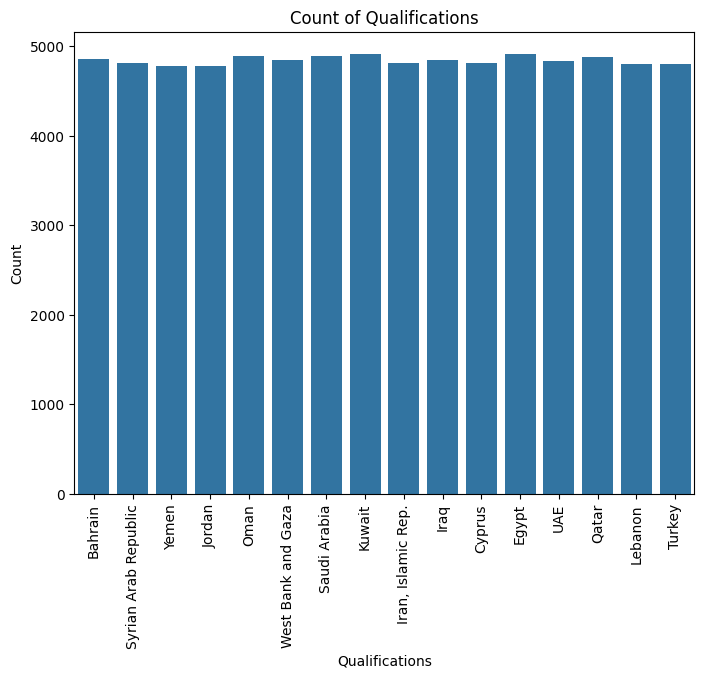

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot count plot for 'Country'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Country')
plt.xlabel('Qualifications')
plt.ylabel('Count')
plt.title('Count of Qualifications')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

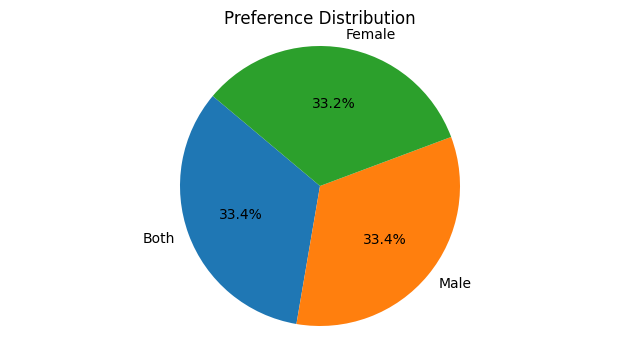

In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of each preference category
preference_counts = data['Preference'].value_counts()

# Extract preference categories and their counts
labels = preference_counts.index
counts = preference_counts.values

# Create a pie chart
plt.figure(figsize=(8, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Preference Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#**2. Neural Network Experimentation**

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['Min_Years_Experience', 'Max_Years_Experience']
data_sampled[numerical_columns] = scaler.fit_transform(data_sampled[numerical_columns])

In [ ]:
# Encode categorical features
columns_to_encode = ["location", "Country",  "Job Title", "Work Type", "Role", "Job Portal", "skills", "Company"]
encoder = LabelEncoder()
for col in columns_to_encode:
    data_sampled[col] = encoder.fit_transform(data_sampled[col])

# Encode target variable
label_encoder = LabelEncoder()
data_sampled['Preference'] = label_encoder.fit_transform(data_sampled['Preference'])

In [ ]:
# Split the data into train, validation, and test sets
X = data_sampled.drop(columns=["Job Id", "Qualifications", "Salary Range", "Job Posting Date", "Work Type", "Recruiter Name", "Contact", "Job Title", "Job Description", "Benefits", "Responsibilities"])
y = data_sampled["Preference"]

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6172, 9) (6172, 2)
Validation set shape: (2058, 9) (2058, 2)
Testing set shape: (2058, 9) (2058,)


In [ ]:

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(54, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40        
                                                                 
 dense_1 (Dense)             (None, 20)                100       
                                                                 
 dense_2 (Dense)             (None, 54)                1134      
                                                                 
 dense_3 (Dense)             (None, 10)                550       
                                                                 
 dense_4 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,846
Trainable params: 1,846
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
193/193 [==============================] - 3s 5ms/step - loss: 1.0874 - accuracy: 0.5053 - val_loss: 0.7149 - val_accuracy: 0.4903
Epoch 2/10
193/193 [==============================] - 1s 4ms/step - loss: 0.7199 - accuracy: 0.5079 - val_loss: 0.7088 - val_accuracy: 0.5015
Epoch 3/10
193/193 [==============================] - 1s 5ms/step - loss: 0.7178 - accuracy: 0.5117 - val_loss: 0.7096 - val_accuracy: 0.4971
Epoch 4/10
193/193 [==============================] - 1s 5ms/step - loss: 0.7127 - accuracy: 0.5120 - val_loss: 0.7518 - val_accuracy: 0.5204
Epoch 5/10
193/193 [==============================] - 1s 6ms/step - loss: 0.7127 - accuracy: 0.5104 - val_loss: 0.7390 - val_accuracy: 0.5228
Epoch 6/10
193/193 [==============================] - 1s 6ms/step - loss: 0.7142 - accuracy: 0.5005 - val_loss: 0.7031 - val_accuracy: 0.4874
Epoch 7/10
193/193 [==============================] - 1s 5ms/step - loss: 0.7085 - accuracy: 0.5130 - val_loss: 0.6964 - val_accuracy: 0.5044
Epoch 

In [ ]:
# Adjust model output for binary classification
model = Sequential([
    Dense(1, activation='sigmoid')  # Output layer with a single neuron and sigmoid activation for binary classification
])

# Compile the model with appropriate loss and metrics for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to integers (0 or 1)
#y_test_binary = (y_test == 'Female').astype(int)  # Assuming 'Female' is the positive class

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

65/65 [==============================] - 1s 3ms/step - loss: 63.0429 - accuracy: 0.4932
Test Loss: 63.04287338256836
Test Accuracy: 0.4931972920894623


In [ ]:
# Make predictions on new instances
X_new_scaled = scaler.transform(X_test[:3])  # Scale new instances using the same scaler
y_pred = model.predict(X_new_scaled)

# Print predictions
#print("Work Types: Contract: 0 | Intern: 1 | Part-Time: 2 | Temporary: 3 | Full-Time: 4\n---------------")
print("Prefrenses: | Male: 0 | Female: 1 \n---------------")

print("Predictions for the first 3 instances:")
for i, pred in enumerate(y_pred):
    predicted_class = label_encoder.inverse_transform([pred.argmax()])[0]
    print(f"Instance {i+1}: Predicted Class - {predicted_class}")

1/1 [==============================] - 0s 99ms/step
Prefrenses: | Male: 0 | Female: 1 
---------------
Predictions for the first 3 instances:
Instance 1: Predicted Class - 0
Instance 2: Predicted Class - 0
Instance 3: Predicted Class - 0


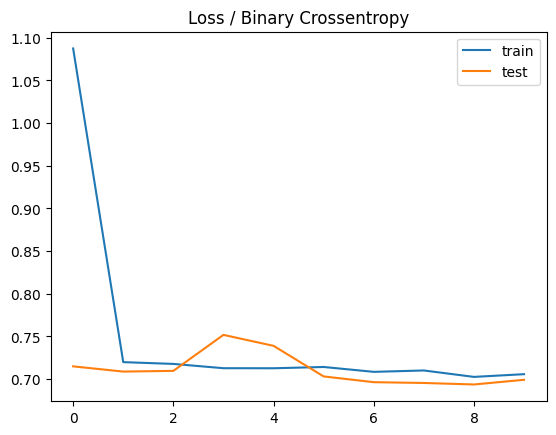

In [ ]:
# plot loss during training
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 2nd Model

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model with regularization and batch normalization
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64, activation="relu"),
    #tf.keras.layers.Dropout(0.4),  # Dropout for regularization

    tf.keras.layers.Dense(43, activation="relu"),
    #tf.keras.layers.BatchNormalization(),  # Batch normalization for stabilizing training
    #tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(80, activation="relu"),
    #tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(54, activation="relu"),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="sigmoid")
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer="adam",
              loss="binary_crossentropy",  # Use appropriate loss function
              metrics=["accuracy"])

# Implement early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 43)                2795      
                                                                 
 dense_8 (Dense)             (None, 80)                3520      
                                                                 
 dense_9 (Dense)             (None, 54)                4374      
                                                                 
 dense_10 (Dense)            (None, 20)                1100      
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
 dense_12 (Dense)            (None, 2)                

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/20
49/49 [==============================] - 3s 19ms/step - loss: 1.5039 - accuracy: 0.5023 - val_loss: 0.7181 - val_accuracy: 0.5199
Epoch 2/20
49/49 [==============================] - 0s 4ms/step - loss: 0.7022 - accuracy: 0.5053 - val_loss: 0.6980 - val_accuracy: 0.5175
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.5031 - val_loss: 0.6947 - val_accuracy: 0.5311
Epoch 4/20
49/49 [==============================] - 0s 6ms/step - loss: 0.6962 - accuracy: 0.5065 - val_loss: 0.6941 - val_accuracy: 0.5170
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5309 - val_loss: 0.6925 - val_accuracy: 0.5233
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5297 - val_loss: 0.6972 - val_accuracy: 0.5408
Epoch 7/20
49/49 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5420 - val_loss: 0.6904 - val_accuracy: 0.5515
Epoch 8/20
49/49 [=

In [ ]:
# Adjust model output for binary classification
model = Sequential([
    tf.keras.layers.Dense(2, activation="relu"),
    Dense(1, activation='sigmoid')  # Output layer with a single neuron and sigmoid activation
])

# Compile the model with appropriate loss and metrics for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to integers (0 or 1)
y_test_binary = (y_test == 'Female').astype(int)  # Assuming 'Female' is the positive class

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


65/65 [==============================] - 0s 1ms/step - loss: 18.0358 - accuracy: 0.4981
Test Loss: 18.03584861755371
Test Accuracy: 0.4980563521385193


In [ ]:
# Make predictions on new instances
X_new_scaled = scaler.transform(X_test[:3])  # Scale new instances using the same scaler
y_pred = model.predict(X_new_scaled)

# Print predictions
#print("Work Types: Contract: 0 | Intern: 1 | Part-Time: 2 | Temporary: 3 | Full-Time: 4\n---------------")
print("Prefrenses: | Male: 0 | Female: 1 \n---------------")

print("Predictions for the first 3 instances:")
for i, pred in enumerate(y_pred):
    predicted_class = label_encoder.inverse_transform([pred.argmax()])[0]
    print(f"Instance {i+1}: Predicted Class - {predicted_class}")

1/1 [==============================] - 0s 41ms/step
Prefrenses: | Male: 0 | Female: 1 
---------------
Predictions for the first 3 instances:
Instance 1: Predicted Class - 0
Instance 2: Predicted Class - 0
Instance 3: Predicted Class - 0


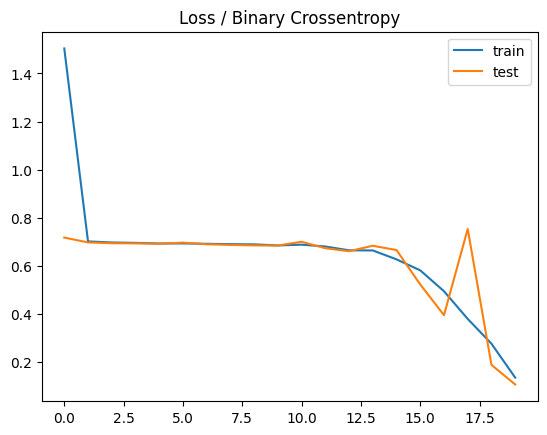

In [ ]:
# plot loss during training
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 3rd Model

In [ ]:
# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model with regularization and batch normalization
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(52, activation="sigmoid"),

    #tf.keras.layers.Dropout(0.4),  # Dropout for regularization
    tf.keras.layers.Dense(33, activation="sigmoid"),

    #tf.keras.layers.BatchNormalization(),  # Batch normalization for stabilizing training
    #tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(50, activation="sigmoid"),
    #tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(74, activation="sigmoid"),

    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="sigmoid"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="sigmoid")
])

# Compile the model with appropriate loss function and optimizer
model.compile(optimizer="sgd",
              loss="binary_crossentropy",  # Use appropriate loss function
              metrics=["accuracy"])

# Implement early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 52)                520       
                                                                 
 dense_16 (Dense)            (None, 33)                1749      
                                                                 
 dense_17 (Dense)            (None, 50)                1700      
                                                                 
 dense_18 (Dense)            (None, 74)                3774      
                                                                 
 dense_19 (Dense)            (None, 10)                750       
                                                                 
 dense_20 (Dense)            (None, 2)                 22        
                                                                 
Total params: 8,515
Trainable params: 8,515
Non-traina

In [ ]:
# Train the model with early stopping and validation data
history = model.fit(X_train, y_train, batch_size=128, epochs=50, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.7228 - accuracy: 0.4989 - val_loss: 0.7152 - val_accuracy: 0.4776
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.4989 - val_loss: 0.7051 - val_accuracy: 0.4776
Epoch 3/50
49/49 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.4989 - val_loss: 0.6997 - val_accuracy: 0.4776
Epoch 4/50
49/49 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.4989 - val_loss: 0.6966 - val_accuracy: 0.4776
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4989 - val_loss: 0.6950 - val_accuracy: 0.4776
Epoch 6/50
49/49 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4951 - val_loss: 0.6941 - val_accuracy: 0.4776
Epoch 7/50
49/49 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4913 - val_loss: 0.6936 - val_accuracy: 0.4981
Epoch 8/50
49/49 [==

In [ ]:
# Adjust model output for binary classification
model = Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    Dense(1, activation='sigmoid')  # Output layer with a single neuron and sigmoid activation
])

# Compile the model with appropriate loss and metrics for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to integers (0 or 1)
y_test_binary = (y_test == 'Female').astype(int)  # Assuming 'Female' is the positive class

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


65/65 [==============================] - 0s 1ms/step - loss: 19.5088 - accuracy: 0.5097
Test Loss: 19.508832931518555
Test Accuracy: 0.5097181797027588


In [ ]:
# Make predictions on new instances
X_new_scaled = scaler.transform(X_test[:3])  # Scale new instances using the same scaler
y_pred = model.predict(X_new_scaled)

# Print predictions
#print("Work Types: Contract: 0 | Intern: 1 | Part-Time: 2 | Temporary: 3 | Full-Time: 4\n---------------")
print("Prefrenses: | Male: 0 | Female: 1 \n---------------")

print("Predictions for the first 3 instances:")
for i, pred in enumerate(y_pred):
    predicted_class = label_encoder.inverse_transform([pred.argmax()])[0]
    print(f"Instance {i+1}: Predicted Class - {predicted_class}")

1/1 [==============================] - 0s 62ms/step
Prefrenses: | Male: 0 | Female: 1 
---------------
Predictions for the first 3 instances:
Instance 1: Predicted Class - 0
Instance 2: Predicted Class - 0
Instance 3: Predicted Class - 0


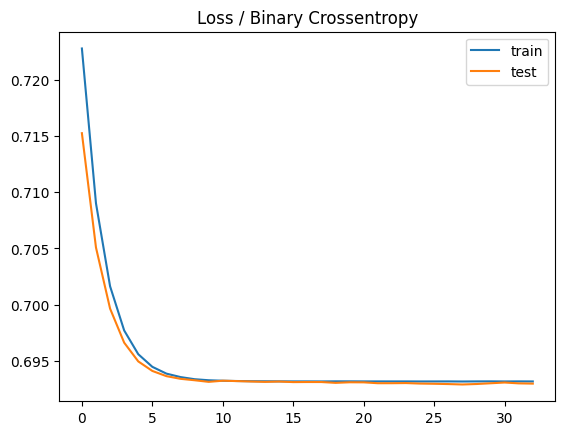

In [ ]:
# plot loss during training
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#4th Model

```
Keras Classifier + GridSearchCV
```





In [ ]:
#pip install tensorflow==2.12.0

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define a function to create the model
def create_model(units=100, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    model.add(Dense(len(label_encoder.classes_), activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'units': [50, 100, 150],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# Print results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

<ipython-input-38-0476a80775ba>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best: 0.499029 using {'batch_size': 128, 'epochs': 20, 'optimizer': 'adam', 'units': 100}


# 5th Model - Keras Tuner

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
import sys
if "google.colab" in sys.modules:
    %pip install -q -U keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a model-building function that accepts hyperparameters as arguments
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='sigmoid'))

    # Compile the model with a learning rate from the hyperparameter search space
    model.compile(optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the tuner and define the search space
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='ML data.csv',
                     project_name='task')

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
model.summary()

Trial 30 Complete [00h 00m 11s]
val_accuracy: 0.8663751482963562

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 17s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 192)               1920      
                                                                 
 dense_4 (Dense)             (None, 192)               37056     
                                                                 
 dense_5 (Dense)             (None, 2)                 386       
                                                                 
Total params: 39,362
Trainable params: 39,362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
193/193 [==============================] - 1s 3ms/step - loss: 2.5086 - accuracy: 0.5243 - val_loss: 0.6934 - val_accuracy: 0.5321
Epoch 2/10
193/193 [==============================] - 1s 3ms/step - loss: 0.6596 - accuracy: 0.6124 - val_loss: 0.6284 - val_accuracy: 0.6152
Epoch 3/10
193/193 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8321 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 4/10
193/193 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/10
193/193 [==============================] - 0s 3ms/step - loss: 0.2292 - accuracy: 0.9514 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/10
193/193 [==============================] - 0s 2ms/step - loss: 7.7380e-04 - accuracy: 1.0000 - val_loss: 2.4298e-04 - val_accuracy: 1.0000
Epoch 7/10
193/193 [==============================] - 0s 2ms/step - loss: 8.5179e-05 - accuracy: 1.0000 - val_loss: 5.8784e-05 - val_accurac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


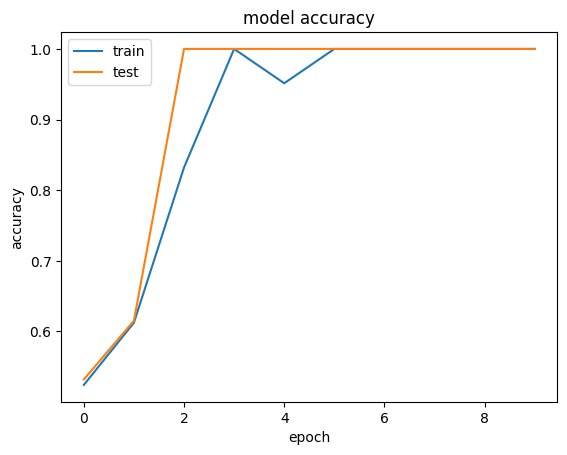

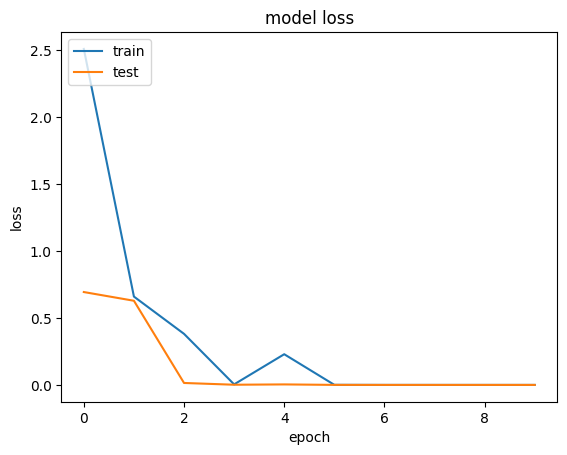

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Adjust model output for binary classification
model = Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    Dense(1, activation='sigmoid')  # Output layer with a single neuron and sigmoid activation
])

# Compile the model with appropriate loss and metrics for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert labels to integers (0 or 1)
y_test_binary = (y_test == 'Female').astype(int)  # Assuming 'Female' is the positive class

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


65/65 [==============================] - 0s 2ms/step - loss: 22.2690 - accuracy: 0.4971
Test Loss: 22.269033432006836
Test Accuracy: 0.4970845580101013


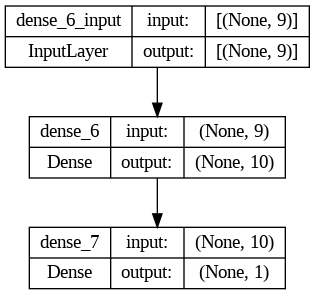

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

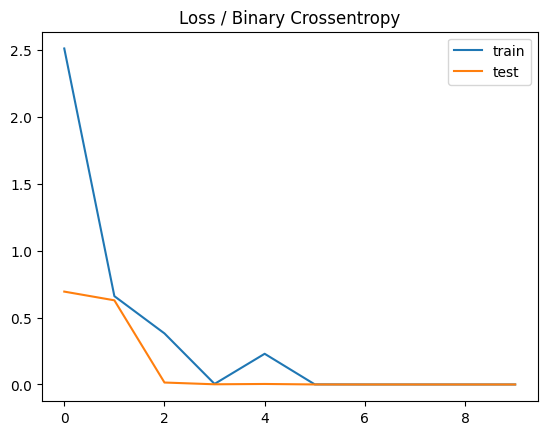

In [ ]:
# plot loss during training
plt.title('Loss / Binary Crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Save the model

```
The model is then converted to JSON format and written to model.json in the local directory. The network weights are written to model.h5 in the local directory.  
```



In [ ]:
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

'from keras.models import model_from_json\n\nmodel_json = model.to_json()\nwith open("model.json", "w") as json_file:\n    json_file.write(model_json)\n# serialize weights to HDF5\nmodel.save_weights("model.h5")\nprint("Saved model to disk")'

#Save Cleaned Data and Download it



In [ ]:
data.to_csv('Job_Descriptions_New.csv', index=False)